In [1]:
# check out list words and the apostrophe situation in the step for loop
# check out allowing more than maxseqlen in generate text
# look into batch size

In [69]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
import sys
from keras.callbacks import LambdaCallback
import random
import matplotlib.pyplot as plt


In [3]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [4]:
def generate_text(seed_text, numb_next_words):
    output=seed_text
    for i in range (numb_next_words):
        
        words_gen = set(seed_text.split())
        words_gen=list(words_gen) #create list of unique words in seed text
        
        
        for i in range (len(words_gen)): #replace all ' in seed text
            words_gen[i]=words_gen[i].replace("‘", '').replace("’", '').replace("'", '')
            
        #create a dictionary with index and word
        word_indices_gen = dict((c, i) for i, c in enumerate(words_gen, 1)) 
        
       #turn sentence into a sequence of numbers
        sequence=[] 
        for word in seed_text.split():
            sequence.append(word_indices_gen[word])
        sequence_padded = pad_sequences([sequence], maxlen=10, padding='pre')
#         sequence_padded=sequence
            
        #create an embedding matrix with same indices as word_index 
        EMBEDDING_DIM=25
        total_words=len(word_indices_gen)+1
        embedding_matrix = np.zeros((total_words, EMBEDDING_DIM))
        for word, i in word_indices_gen.items():
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                # words not found in embedding index will be all-zeros.
                embedding_matrix[i] = embedding_vector
        #create X input with embedding matrix for specific words (by their index)
        gener=[]
        for number in sequence_padded:
            gener.append(embedding_matrix[number])

        predicted=model.predict([gener], verbose=0)

        predicted=sample(predicted[0])
        output_word=""
        for word, index in word_indices.items():
            if index == predicted:
                output_word = word
                break
        output+=" " + output_word
        seed_text+=" " + output_word
        seed_text=seed_text.split(' ', 1)[1]
    return output

In [5]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(listofwords) - maxlen - 1)
    for diversity in [0.5, 1.0]:
        print('----- diversity:', diversity)
        generated = ''
        sentence = listofwords[start_index: start_index + maxlen].str.cat(sep=' ')
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)
        sys.stdout.write(generate_text(generated, 20))


In [6]:
tweet_data=pd.read_csv('../Load_Tweets/data/tweet_data.csv')

In [7]:
tweet_text = tweet_data['TEXT']

In [8]:
tweet_text_all = tweet_data['TEXT'].str.cat(sep=' ')

In [9]:
listofwords=pd.Series(tweet_text_all.split())

In [10]:
tweet_text.head()

0          PAY TO PLAY POLITICS. #CrookedHillary [URL]
1    Very little pick-up by the dishonest media of ...
2    Crooked Hillary Clinton likes to talk about th...
3    Thank you Florida- a MOVEMENT that has never b...
4    Join me Thursday in Florida &amp; Ohio!West Pa...
Name: TEXT, dtype: object

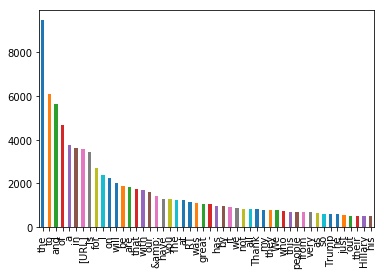

In [81]:
top_words=listofwords.value_counts()
top_words_percent= top_words/len(listofwords)
top_words.head(50).plot.bar()
# top_words.head(50)

In [11]:
total_chars=len(tweet_text_all)
total_chars
total_wordz=len((tweet_text_all.split()))
total_wordz

250988

In [12]:
chars = set(tweet_text_all)
words = set(tweet_text_all.split())
print ("total number of unique words", len(words))
print ("total number of unique chars", len(chars))

total number of unique words 32293
total number of unique chars 369


In [13]:
words=list(words)

In [14]:
#replace apostrophes in dictionary keys 
for i in range (len(words)):
    words[i]=words[i].replace("‘", '').replace("’", '').replace("'", '')

In [15]:
words=set(words)
len(words)

31907

In [16]:
#create forward and reverse word index
word_indices = dict((c, i) for i, c in enumerate(words, 1))
indices_word = dict((i, c) for i, c in enumerate(words,1 ))

In [17]:
len(word_indices)
max(word_indices.values())

31907

In [18]:
#choose step 

maxlen = 10
step = 3

sentences = []
next_words = []
next_words = []
list_words = []

sentences2 = []
for i in range (len(tweet_text)):
    list_words = tweet_text.iloc[i].split()
    for i in range(len( list_words)):
        list_words[i]=list_words[i].replace("‘", '').replace("’", '').replace("'", '')
    for i in range(0, len(list_words) - maxlen, step):
        sentences2 = ' '.join(list_words[i: i + maxlen])
        sentences.append(sentences2)
        next_words.append((list_words[i + maxlen]))

print ('length of sentence list:', len(sentences))
print ("length of next_word list", len(next_words))

length of sentence list: 53194
length of next_word list 53194


In [19]:
sequences=[]
y=[]
for i, sentence in enumerate(sentences):
    sequence=[]
    for j, word in enumerate(sentence.split()):
        sequence.append(word_indices[word])
    sequences.append(sequence)
    y.append(word_indices[next_words[i]])

In [20]:
sequences=np.asarray(sequences)

In [21]:
total_words= len(word_indices)+1
total_words

31908

In [22]:
embeddings_index = {}
f = open('../word_embeding/glove.twitter.27B.25d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [23]:
max(word_indices.values())
len(word_indices)

31907

In [24]:
total_words

31908

In [25]:
EMBEDDING_DIM=25
embedding_matrix = np.zeros((total_words, EMBEDDING_DIM)) 
for word, i in word_indices.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [26]:
embedding_matrix.shape

(31908, 25)

In [27]:
X=[]
for number in sequences:
    X.append(embedding_matrix[number])


In [28]:
X=np.asarray(X)

In [29]:
np.asarray(X).shape

(53194, 10, 25)

In [30]:
embedding_matrix.shape

(31908, 25)

In [31]:
len(embedding_matrix)

31908

In [32]:
len(word_indices)

31907

In [33]:
len(sentences)

53194

In [34]:
embedding_matrix.shape

(31908, 25)

In [35]:
np.asarray(X).shape

(53194, 10, 25)

In [36]:
np.asarray(y).shape

(53194,)

In [37]:
total_words

31908

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Input
# embedding_layer= Embedding(total_words, EMBEDDING_DIM, weights=[embedding_matrix],input_length=max_seq,trainable=False)
# sequence_input = Input(shape=(max_seq,), dtype='int32')
# embedded_sequences= embedding_layer(sequence_input)
model=Sequential()
# e=Embedding(total_words, EMBEDDING_DIM, weights=[embedding_matrix],input_length=maxlen,trainable=False)
# model.add(e)
model.add(LSTM(128, input_shape=(maxlen, EMBEDDING_DIM)))
model.add(Dropout(0.1))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.1))
# model.add(Flatten())
model.add(Dense(total_words, activation="softmax"))
optimizer = RMSprop(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy',  metrics=['accuracy'], optimizer=optimizer)
model.summary()

# model.add(LSTM(128, input_shape=(maxlen, len(chars))))
# model.add(Dense(len(chars), activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=optimizer)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               78848     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 31908)             4116132   
Total params: 4,194,980
Trainable params: 4,194,980
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras.models import load_model
model= load_model("../Saved_models/failed_on_99th_epoch_word_embedding")

In [146]:
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
model.fit(X, y, epochs=10, callbacks=[print_callback])

Epoch 1/10
53194/53194 [==============================] - 61s 1ms/step - loss: 7.8709 - acc: 0.0690

----- Generating text after Epoch: 0
----- diversity: 0.5
----- Generating with seed: "to do so. At some point the Fake News will"
to do so. At some point the Fake News willto do so. At some point the Fake News will be fact North in the important #ThankYouTour2016 He did the two about what They if is a Make if of----- diversity: 1.0
----- Generating with seed: "to do so. At some point the Fake News will"
to do so. At some point the Fake News willto do so. At some point the Fake News will win their our greatest U.S. #VoteTrump back to or are no - cannot News Hillary are Country a win longEpoch 2/10
28768/53194 [===============>..............] - ETA: 26s - loss: 8.6277 - acc: 0.0682

KeyboardInterrupt: 

In [44]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %f' % (accuracy*100))

KeyboardInterrupt: 

In [93]:
print (generate_text("", 20))

 Information asks, 🇺🇸🇵🇷 knocked sometimes sometimes Black ....Paul apart Information nuclear........ knocked knocked sometimes action-it 🇺🇸🇵🇷 nuclear........ nuclear........ action-it nuclear........


In [84]:
model.save('../failed_on_99th_epoch_word_embedding')